Sales Data Project

In [1]:
# import libraries/modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# the data set I used was a sample sales data csv file from kaggle, this is my first project with pandas and python so I referenced the pandas docs, as well as stack overflow for help
# https://www.kaggle.com/datasets/kyanyoga/sample-sales-data/data
# https://pandas.pydata.org/docs/
# https://stackoverflow.com/

In [2]:
# load in csv data file
sales_data = pd.read_csv('sales_data_sample.csv', encoding='latin')

# show first 5 rows just to give me an idea of the data (note: I did some looking at the file in excel before reading in csv to see what the data looked like)
sales_data.head()

,Order_ID,Quantity,Price,Line Number,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


Let's clean some data!

In [3]:
# Let's look at the data types for each column
sales_data.info()

# Let's also look for null values
nan_df = sales_data[sales_data.isna().any(axis=1)]
nan_df
# Now that I know what the data frame looks like, I can begin to drop columns that I do not need for this type of analysis
# I will be dropping most of the contact information because I am only worried about order and sales data
# This will also help using less memory and will not take up as much space in storage
sorted_sales_data = sales_data.drop(['Line Number','PRODUCTCODE','PHONE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME'], 
                                    axis=1)
sorted_sales_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          2823 non-null   int64  
 1   Quantity          2823 non-null   int64  
 2   Price             2823 non-null   float64
 3   Line Number       2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


,Order_ID,Quantity,Price,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,DEALSIZE
0,10107,30,95.70,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,Land of Toys Inc.,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Small
1,10121,34,81.35,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,Reims Collectables,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Small
2,10134,41,94.74,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,Lyon Souveniers,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Medium
3,10145,45,83.26,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,Toys4GrownUps.com,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Medium
4,10159,49,100.00,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,Corporate Gift Ideas Co.,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,2244.40,12/2/2004 0:00,Shipped,4,12,2004,Ships,54,Euro Shopping Channel,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Small
2819,10373,29,100.00,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,54,"Oulu Toy Supplies, Inc.",Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Medium
2820,10386,43,100.00,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,54,Euro Shopping Channel,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Medium
2821,10397,34,62.24,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,54,Alpha Cognac,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Small


In [4]:
# the ADDRESS2 column had a lot of null values so I will change those to empty values, also with city/state
# I will also add Address column, which will combine all of the address columns so they become one and then drop them, then put Address column next to customername
sorted_sales_data['Address'] = sorted_sales_data['ADDRESSLINE1'].fillna('') + " " + sorted_sales_data['ADDRESSLINE2'].fillna('') \
                                + ", " + sorted_sales_data['CITY'].fillna('') + ", " + sorted_sales_data['STATE'].fillna('') + " " + sorted_sales_data['TERRITORY'].fillna('')
sorted_sales_data.drop(['ADDRESSLINE1','ADDRESSLINE2', 'CITY', 'STATE', 'TERRITORY'], axis=1, inplace=True)

# I was looking at various ways to change the position of the Address column and this was a solution I liked
col = sorted_sales_data.pop('Address')
sorted_sales_data.insert(12, col.name, col)


In [5]:
# Lets see what the data types look like and see if we need to change any
sorted_sales_data.head()

,Order_ID,Quantity,Price,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,Address,POSTALCODE,COUNTRY,DEALSIZE
0,10107,30,95.70,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,Land of Toys Inc.,"897 Long Airport Avenue , NYC, NY",10022,USA,Small
1,10121,34,81.35,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,Reims Collectables,"59 rue de l'Abbaye , Reims, EMEA",51100,France,Small
2,10134,41,94.74,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,Lyon Souveniers,"27 rue du Colonel Pierre Avia , Paris, EMEA",75508,France,Medium
3,10145,45,83.26,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,Toys4GrownUps.com,"78934 Hillside Dr. , Pasadena, CA",90003,USA,Medium
4,10159,49,100.00,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,Corporate Gift Ideas Co.,"7734 Strong St. , San Francisco, CA",NaN,USA,Medium


In [6]:
# Next I see that the ORDERDATE column does not need the time involved so I will get rid of this as well so it is just the date
sorted_sales_data['ORDERDATE'] = pd.to_datetime(sorted_sales_data['ORDERDATE'])
sorted_sales_data['ORDERDATE'] = sorted_sales_data['ORDERDATE'].dt.strftime('%m/%d/%Y')

In [7]:
# Let's clean up the column headers to look more readable
sorted_sales_data.columns = [x.capitalize() for x in sorted_sales_data.columns]
sorted_sales_data.rename(columns= {'Orderdate': 'Order_date', 'Productline': 'Product_line', 'Customername': 'Customer_name', 'Postalcode': 'Postal_code', 'Dealsize': 'Deal_size'}, inplace=True)
sorted_sales_data

,Order_id,Quantity,Price,Sales,Order_date,Status,Qtr_id,Month_id,Year_id,Product_line,Msrp,Customer_name,Address,Postal_code,Country,Deal_size
0,10107,30,95.70,2871.00,02/24/2003,Shipped,1,2,2003,Motorcycles,95,Land of Toys Inc.,"897 Long Airport Avenue , NYC, NY",10022,USA,Small
1,10121,34,81.35,2765.90,05/07/2003,Shipped,2,5,2003,Motorcycles,95,Reims Collectables,"59 rue de l'Abbaye , Reims, EMEA",51100,France,Small
2,10134,41,94.74,3884.34,07/01/2003,Shipped,3,7,2003,Motorcycles,95,Lyon Souveniers,"27 rue du Colonel Pierre Avia , Paris, EMEA",75508,France,Medium
3,10145,45,83.26,3746.70,08/25/2003,Shipped,3,8,2003,Motorcycles,95,Toys4GrownUps.com,"78934 Hillside Dr. , Pasadena, CA",90003,USA,Medium
4,10159,49,100.00,5205.27,10/10/2003,Shipped,4,10,2003,Motorcycles,95,Corporate Gift Ideas Co.,"7734 Strong St. , San Francisco, CA",NaN,USA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,2244.40,12/02/2004,Shipped,4,12,2004,Ships,54,Euro Shopping Channel,"C/ Moralzarzal, 86 , Madrid, EMEA",28034,Spain,Small
2819,10373,29,100.00,3978.51,01/31/2005,Shipped,1,1,2005,Ships,54,"Oulu Toy Supplies, Inc.","Torikatu 38 , Oulu, EMEA",90110,Finland,Medium
2820,10386,43,100.00,5417.57,03/01/2005,Resolved,1,3,2005,Ships,54,Euro Shopping Channel,"C/ Moralzarzal, 86 , Madrid, EMEA",28034,Spain,Medium
2821,10397,34,62.24,2116.16,03/28/2005,Shipped,1,3,2005,Ships,54,Alpha Cognac,"1 rue Alsace-Lorraine , Toulouse, EMEA",31000,France,Small


In [8]:
# Now that I have the data in a way that I want lets see some data about the data
sorted_sales_data[['Quantity', 'Price', 'Sales', 'Msrp']].describe()

,Quantity,Price,Sales,Msrp
count,2823.000000,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,3553.889072,100.715551
std,9.741443,20.174277,1841.865106,40.187912
min,6.000000,26.880000,482.130000,33.000000
25%,27.000000,68.860000,2203.430000,68.000000
50%,35.000000,95.700000,3184.800000,99.000000
75%,43.000000,100.000000,4508.000000,124.000000
max,97.000000,100.000000,14082.800000,214.000000


In [9]:
# I am going to plot some sales data, but first I need to filter to what I want
# The question I would like to answer first is: "What year had the highest sales?" I am going to make a bar graph for this
sales_by_year = sorted_sales_data.groupby(['Year_id'])['Sales'].sum().reset_index()

sales_by_year

,Year_id,Sales
0,2003,3516979.54
1,2004,4724162.60
2,2005,1791486.71


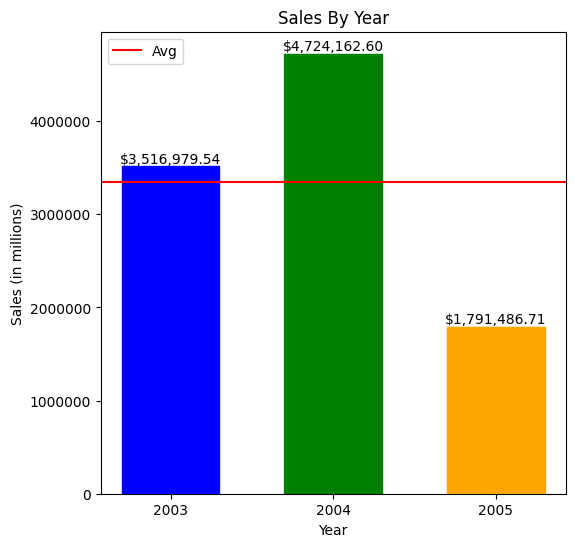

In [10]:
# Lets graph it!
plt.figure(figsize=(6, 6))
bars = plt.bar(sales_by_year['Year_id'], sales_by_year['Sales'], width=0.6)

bars[0].set_color('blue')
bars[1].set_color('green')
bars[2].set_color('orange')
# title/labels
plt.bar_label(bars, labels=[f'${x:,.2f}' for x in bars.datavalues]) 

plt.title("Sales By Year")

plt.xlabel('Year')
plt.xticks(sales_by_year.Year_id)
plt.ylabel('Sales (in millions)')
plt.ticklabel_format(style='plain')

plt.axhline(np.nanmean(sales_by_year['Sales'].mean()), color='r', label="Avg")
# show the graph
plt.legend(loc="upper left")
plt.show()

Now that we can see the yearly sales for the 2 1/2 years, let's look at the monthly sales per year
I am going to make a line chart for this

In [11]:
# First we must take the sorted data and then instead of group by year_id, will I will group by month_id
sales_by_month = sorted_sales_data.groupby(['Year_id', 'Month_id'])['Sales'].sum().reset_index()

sales_by_month

,Year_id,Month_id,Sales
0,2003,1,129753.60
1,2003,2,140836.19
2,2003,3,174504.90
3,2003,4,201609.55
4,2003,5,192673.11
5,2003,6,168082.56
6,2003,7,187731.88
7,2003,8,197809.30
8,2003,9,263973.36
9,2003,10,568290.97


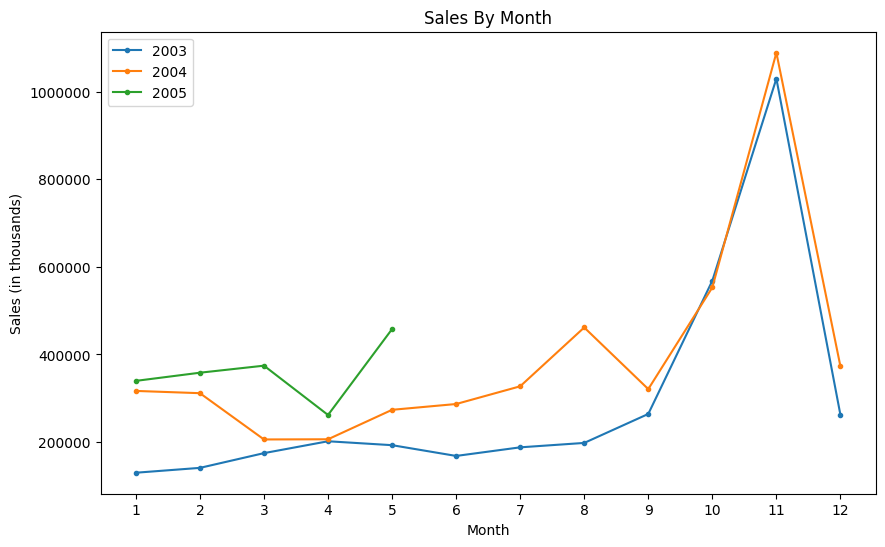

In [12]:
# Create a pivot table to ensure consistent x-axis values for all years
pivot_table = pd.pivot_table(sales_by_month, values='Sales', index='Month_id', columns='Year_id', aggfunc='sum')

# Fill missing values with NaN
pivot_table = pivot_table.fillna(np.nan)

# Set the x-axis positions for the available months (up to 5 for the third year)
x_positions = np.arange(1, pivot_table.index.nunique() + 1)

plt.figure(figsize=(10, 6))

for year in pivot_table.columns:
    # Create a mask to filter out NaN values beyond the available data
    mask = ~pivot_table[year].isna()
    
    plt.plot(x_positions[mask], pivot_table[year][mask], '.-', label=str(year))

plt.title("Sales By Month")
plt.xlabel('Month')
plt.ylabel('Sales (in thousands)')
plt.ticklabel_format(style='plain')
plt.legend(loc="upper right")

# Set the x-axis ticks and labels
x_labels = pivot_table.index.dropna()
plt.xticks(x_positions, x_labels)

# Put a legend to the right of the current axis
plt.legend(loc='upper left')

plt.show()

Now that we know a bit about the sales, I am going to graph the top 5 countries that produce sales

In [13]:
sales_by_country = sorted_sales_data.groupby('Country')['Sales'].sum().reset_index()

top_5_countries = sales_by_country.nlargest(5, 'Sales')
top_5_countries

,Country,Sales
18,USA,3627982.83
14,Spain,1215686.92
6,France,1110916.52
0,Australia,630623.10
17,UK,478880.46


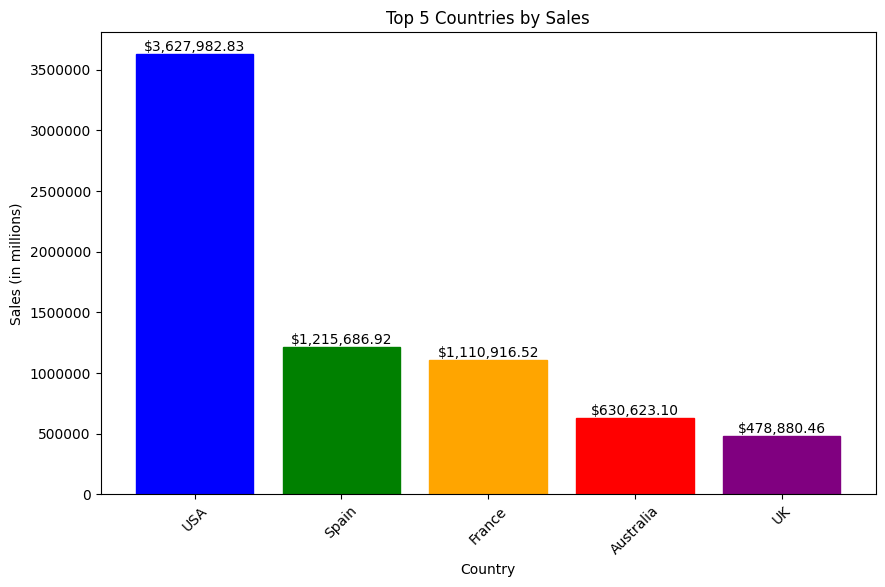

In [14]:
plt.figure(figsize=(10, 6))

# Create a bar plot for the top 5 countries
bar = plt.bar(top_5_countries['Country'], top_5_countries['Sales'])

bar[0].set_color('blue')
bar[1].set_color('green')
bar[2].set_color('orange')
bar[3].set_color('red')
bar[4].set_color('purple')


plt.bar_label(bar, labels=[f'${x:,.2f}' for x in bar.datavalues]) 

plt.title("Top 5 Countries by Sales")
plt.xlabel('Country')
plt.ylabel('Sales (in millions)')
plt.ticklabel_format(style='plain', axis='y')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()